# Ablation plots: mask ratio × decoder depth

This notebook plots linear probe (LP) and fine-tune (FT) top-1 accuracy for CIFAR-100 and STL-10 across mask ratios and decoder depths. Values are filled from the completed runs (see `experiments/logs/`).

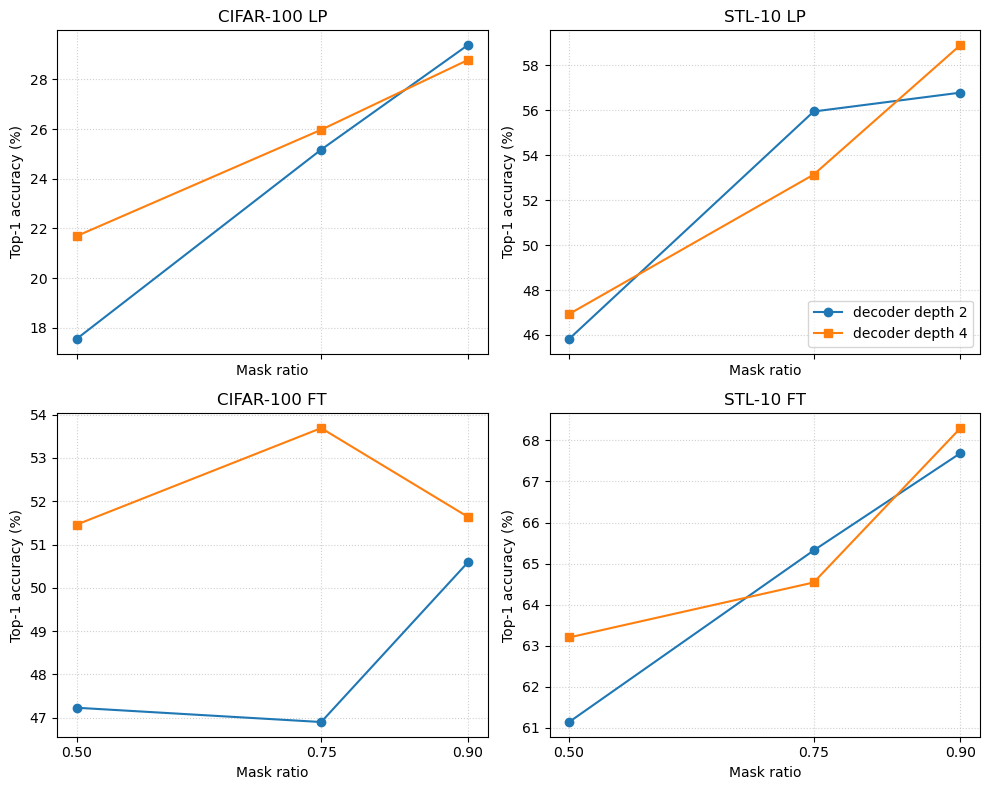

In [1]:
import matplotlib.pyplot as plt

mask_ratios = [0.50, 0.75, 0.90]

# Top-1 accuracy (%) from completed runs
lp_cifar = {
    2: [17.55, 25.17, 29.38],
    4: [21.69, 25.97, 28.78],
}
lp_stl = {
    2: [45.82, 55.95, 56.79],
    4: [46.93, 53.14, 58.91],
}
ft_cifar = {
    2: [47.23, 46.90, 50.59],
    4: [51.46, 53.69, 51.64],
}
ft_stl = {
    2: [61.14, 65.32, 67.69],
    4: [63.20, 64.54, 68.30],
}

fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True)
panels = [
    (axes[0, 0], lp_cifar, "CIFAR-100 LP"),
    (axes[0, 1], lp_stl, "STL-10 LP"),
    (axes[1, 0], ft_cifar, "CIFAR-100 FT"),
    (axes[1, 1], ft_stl, "STL-10 FT"),
]

for ax, data, title in panels:
    for depth, color, marker in [(2, "tab:blue", "o"), (4, "tab:orange", "s")]:
        ax.plot(mask_ratios, data[depth], label=f"decoder depth {depth}", color=color, marker=marker)
    ax.set_title(title)
    ax.set_ylabel("Top-1 accuracy (%)")
    ax.set_xlabel("Mask ratio")
    ax.set_xticks(mask_ratios)
    ax.grid(True, linestyle=":", alpha=0.6)

axes[0, 1].legend(loc="lower right")
plt.tight_layout()
plt.show()